<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving states_edu.csv to states_edu (1).csv


In [ ]:
df = pd.read_csv('states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: **8th grade math scores**

Outcome Score in the questions refers to the outcome variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [ ]:
years= df['YEAR']
yearsClean=[]
[yearsClean.append(x) for x in years if x not in yearsClean]  
len(yearsClean)

33

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [ ]:
import math
states = df['STATE']
scores= df['AVG_MATH_8_SCORE']
michigan=[]
ohio=[]
i=0
for x in states:
  
  if x=="MICHIGAN":
    michigan.append(scores[i])
  if x=="OHIO":
    ohio.append(scores[i])
  i=i+1
michigan= [x for x in michigan if math.isnan(x) == False]
ohio= [x for x in ohio if math.isnan(x) == False]
ohioavg = sum(ohio)/len(ohio)
michavg=sum(michigan)/len(michigan)
print("MICHIGAN AVG: ")
print(michavg)
print("OHIO AVG: ")
print(ohioavg)
print("OHIO WINS!")

MICHIGAN AVG: 
276.1666666666667
OHIO AVG: 
282.25
OHIO WINS!


Find the average for your outcome score across all states in 2019

In [ ]:
import math
scores= df['AVG_MATH_8_SCORE']
years= df['YEAR']
scores2019=[]
i=0
for x in years:
  if x==2019:
    scores2019.append(scores[i])
  i=i+1

scores2019 = [x for x in scores2019 if math.isnan(x) == False]
avg=sum(scores2019)/len(scores2019)
avg

281.2641509433962

Find the maximum outcome score for every state. Hint: there's a function that allows you to do this easily

In [ ]:
statesClean =[]
[statesClean.append(x) for x in states if x not in statesClean]
state_highest=[]
for x in statesClean:
  z=0
  max=0
  for i in states:
    if (i==x):
      if (scores[z]>max):
        max=scores[z]
    z=z+1
  state_highest.append(x)
  state_highest.append(max)
  
state_highest


['ALABAMA',
 269.0,
 'ALASKA',
 283.0,
 'ARIZONA',
 283.0,
 'ARKANSAS',
 279.0,
 'CALIFORNIA',
 277.0,
 'COLORADO',
 292.0,
 'CONNECTICUT',
 289.0,
 'DELAWARE',
 284.0,
 'DISTRICT_OF_COLUMBIA',
 269.0,
 'FLORIDA',
 281.0,
 'GEORGIA',
 281.0,
 'HAWAII',
 281.0,
 'IDAHO',
 287.0,
 'ILLINOIS',
 285.0,
 'INDIANA',
 288.0,
 'IOWA',
 286.0,
 'KANSAS',
 290.0,
 'KENTUCKY',
 282.0,
 'LOUISIANA',
 273.0,
 'MAINE',
 289.0,
 'MARYLAND',
 288.0,
 'MASSACHUSETTS',
 301.0,
 'MICHIGAN',
 280.0,
 'MINNESOTA',
 295.0,
 'MISSISSIPPI',
 274.0,
 'MISSOURI',
 286.0,
 'MONTANA',
 293.0,
 'NEBRASKA',
 288.0,
 'NEVADA',
 278.0,
 'NEW_HAMPSHIRE',
 296.0,
 'NEW_JERSEY',
 296.0,
 'NEW_MEXICO',
 274.0,
 'NEW_YORK',
 283.0,
 'NORTH_CAROLINA',
 286.0,
 'NORTH_DAKOTA',
 293.0,
 'OHIO',
 290.0,
 'OKLAHOMA',
 279.0,
 'OREGON',
 285.0,
 'PENNSYLVANIA',
 290.0,
 'RHODE_ISLAND',
 284.0,
 'SOUTH_CAROLINA',
 282.0,
 'SOUTH_DAKOTA',
 291.0,
 'TENNESSEE',
 280.0,
 'TEXAS',
 290.0,
 'UTAH',
 287.0,
 'VERMONT',
 295.0,
 'VIRGI

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (chosen outcome variable). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [ ]:
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL']
df['EDUCATIONAL_EXPENDITURE/TOTAL_EXPENDITURE']=df['SUPPORT_SERVICES_EXPENDITURE']/df["TOTAL_EXPENDITURE"]
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT,EDUCATIONAL_EXPENDITURE/TOTAL_EXPENDITURE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,NaN,0.276975
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN,NaN,0.360829
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,NaN,0.296254
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,NaN,0.277385
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,NaN,0.313975


Final feature list: **<Support services expenditure per student, Educational expenditure/ total expenditure, number of 8th grade students>**

Feature selection justification: **Different states have different numbers of students/people and revenue. We need to look at how much each state is spending per student instead of how much they are simply spending overall. Moreover, different states have different budgets and how much of the budget is spent on education helps us determine that state's priorities. Also, there might be a correlation with scores and number of students since it is always harder to manage more people.**

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen outcome variable with any features you chose

**Visualization 1**

Text(0.5, 1.0, 'Distribution of 8th grade scores')

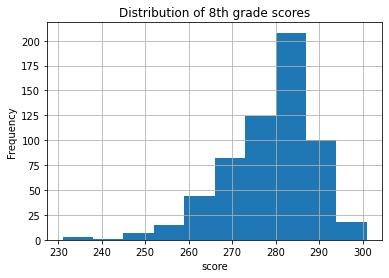

In [ ]:
df.AVG_MATH_8_SCORE.hist()
plt.xlabel('score')
plt.ylabel('Frequency')
plt.title('Distribution of 8th grade scores')

**distribution of 8th grade math scores**

**Visualization 2**

Text(0, 0.5, '8th grade math scores')

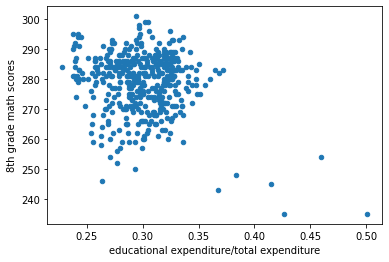

In [ ]:
df.plot.scatter(x='EDUCATIONAL_EXPENDITURE/TOTAL_EXPENDITURE',y='AVG_MATH_8_SCORE')
plt.xlabel('educational expenditure/total expenditure')
plt.ylabel('8th grade math scores')

**educational expenditure/total expenditure comapred to the average 8th grade math score**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.dropna()
X = df[['EDUCATIONAL_EXPENDITURE/TOTAL_EXPENDITURE', 'GRADES_8_G', 'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE'].dropna()
X= df.loc[y.index][['EDUCATIONAL_EXPENDITURE/TOTAL_EXPENDITURE', 'GRADES_8_G', 'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT']]
#print(X)
#print(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: **REGRESSION**

In [ ]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [ ]:
# create your model here
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


Text(0, 0.5, 'MATH 8 score')

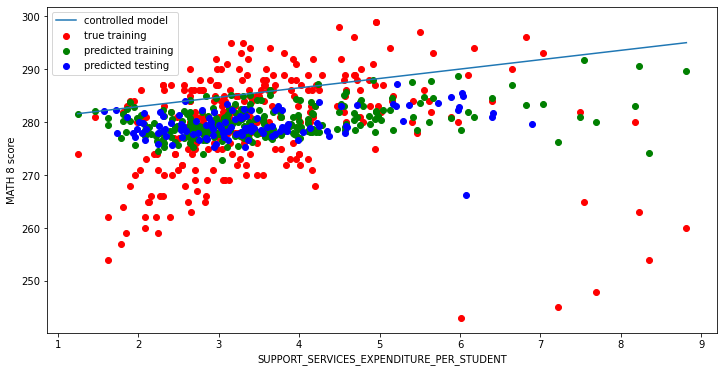

In [ ]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('MATH 8 score')

In [ ]:
print("intercept:")
print(model.intercept_)
print("coef:")
print(model.coef_)
print("R^2:")
# R**2 value describes how well a linear model fits the data
print(model.score(X_test, y_test))
print("mean error:")
# mean error
print(np.mean(model.predict(X_test)-y_test))
print("mean absolute error:")
# mean absolute error
print(np.mean(np.abs(model.predict(X_test)-y_test)))
print("root mean squared error:")
# root mean squared error -- penalizes large errors
np.mean((model.predict(X_test)-y_test)**2)**0.5

intercept:
301.97533398109834
coef:
[-9.28232273e+01 -7.19469288e-06  1.77365315e+00]
R^2:
0.27992505547479984
mean error:
-0.4105837896689863
mean absolute error:
5.698050533211051
root mean squared error:


7.408539836993613

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK AND FINDINGS\>**
I decided that the outcome variable would be the Math scores for 8th graders. For my features, I wanted to see if there was a correlation between the number of students in 8th grade, the expenditure per student, and the percentage of the total expenditure that goes toward education and the 8th grade Math scores. Since our variance was way too low, I can assume that there is little to no correlation of this "bundle" of features when comparing it to the 8th grade math scores. I personally think that the feature that brought my variance to such a low value was the number of 8th graders. When plotting a graph using the model, but only using the feature of number of 8th graders, the line was almost flat. 